## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/data/elma/dataset_intent_detection.csv"
df = pd.read_csv(path, names=['intent', 'phrase'])
df.head()

,intent,phrase
0,Positive-reaction,- а то
1,Positive-reaction,- а я о чем и говорю
2,Positive-reaction,- бомба
3,Positive-reaction,- вай-вай
4,Positive-reaction,- вау


## 1

### a.

In [ ]:
intent_count = df.groupby('intent').agg('count').sort_values('phrase', ascending = False)
intent_count

,phrase
intent,
Small_talk_food,130
Another_joke,110
Whoops,105
Smalltalk_answer,101
Small_talk_boss,91
Small_talk_fired,83
Small_talk_you_are_right,81
Sick_of_listeting,72
Small_talk_creators,70


In [ ]:
intent_count["phrase_ratio"] = intent_count["phrase"]/len(df)
intent_count

,phrase,phrase_ratio
intent,,
Small_talk_food,130,0.062201
Another_joke,110,0.052632
Whoops,105,0.050239
Smalltalk_answer,101,0.048325
Small_talk_boss,91,0.043541
Small_talk_fired,83,0.039713
Small_talk_you_are_right,81,0.038756
Sick_of_listeting,72,0.034450
Small_talk_creators,70,0.033493


### b.

Для упрощения подсчёта слов и дальнейших этапов проекта напишем 2 функции:
* по приведению слов в нормальную форму, что очень важно при обработке русского языка с его множеством форм слов (падежы, склонения, формы глаголов и т.д.). С помощью неё мы значительно уменьшим размер потенциального словаря
* по токенизации слов 

In [ ]:
!pip install pymorphy2
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def norm_converter(sentence):
    """
    Функция для приведения слов в норм.форму
    """
    parsed_token = morph.parse(sentence) 
    return parsed_token[0].normal_form

df["phrase_norm"] = df["phrase"].apply(norm_converter)

     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 8.2 MB 5.5 MB/s 


In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('russian')

def tokenize_text(raw_text: str):
    """Функция для токенизации текста с удалением "стоп-слов"
    
    :param raw_text: исходная текстовая строка
    """
    tokenized_str = word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
    filtered_tokens = [i for i in tokens if ( i not in stop_words )]
    return filtered_tokens


def tokenize_text_easy(raw_text: str):
    """
    Функция для токенизации текста без фильтрации "стоп-слов"
    """
    tokenized_str = word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
"""
Применяем функцию в датафрейму с помощью метода .apply()
"""
tokenized_phrases = df.phrase_norm.apply(tokenize_text)
tokenized_phrases_easy = df.phrase_norm.apply(tokenize_text_easy)

"""
# добавляем новую колонку в исходный датафрейм
"""

df = df.assign(tokenized=tokenized_phrases, tokenized_easy=tokenized_phrases_easy)
df.head()

,intent,phrase,phrase_norm,tokenized,tokenized_easy
0,Positive-reaction,- а то,- а тый,[тый],"[а, тый]"
1,Positive-reaction,- а я о чем и говорю,- а я о чем и говорить,[говорить],"[а, я, о, чем, и, говорить]"
2,Positive-reaction,- бомба,- бомба,[бомба],[бомба]
3,Positive-reaction,- вай-вай,- вай-вать,[вай-вать],[вай-вать]
4,Positive-reaction,- вау,- вау,[вау],[вау]


In [ ]:
df["words_count"] = df["tokenized_easy"].apply(lambda x: len(x))
df.head()

,intent,phrase,phrase_norm,tokenized,tokenized_easy,words_count
0,Positive-reaction,- а то,- а тый,[тый],"[а, тый]",2
1,Positive-reaction,- а я о чем и говорю,- а я о чем и говорить,[говорить],"[а, я, о, чем, и, говорить]",6
2,Positive-reaction,- бомба,- бомба,[бомба],[бомба],1
3,Positive-reaction,- вай-вай,- вай-вать,[вай-вать],[вай-вать],1
4,Positive-reaction,- вау,- вау,[вау],[вау],1


In [ ]:
"""
Оценим длину фразы для каждого класса
"""

phrase_length_est_group = df.groupby("intent").words_count.agg(["min", "max", "median"])
phrase_length_est_group

,min,max,median
intent,,,
Another_joke,2,9,4.0
AreYouHere,1,3,2.0
Bad_joke,1,9,3.0
Compliment,1,7,3.0
Dont_understand,1,8,3.0
Finish,1,7,2.0
Hello,1,4,2.0
I_can_help,1,4,2.0
Messing_up,1,7,3.0


In [ ]:
"""
Оценим длину фразы для всего корпуса
"""

df.words_count.describe()

count    2090.000000
mean        3.300957
std         1.609227
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: words_count, dtype: float64

### c.

In [ ]:
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def freq_anal(intent_class, with_stops=0):
  """
  Функция для проведения частотного анализа слов класса intent_class и построения облака слов.
  В случае передачи флага with_stops=1 анализ производится по токенам без стоп-слов.
  """
  words = []
  def_df = df[df["intent"]==intent_class]
  if with_stops:
    for text in def_df.tokenized.values:
      for word in text:
        words.append(word)
  else:
    for text in def_df.tokenized_easy.values:
      for word in text:
        words.append(word)

  text = nltk.Text(words)
  fdist = FreqDist(text)
  print(fdist.most_common(9))
  fdist.plot(30,cumulative=False)
  text_raw = " ".join(text)

  wordcloud = WordCloud().generate(text_raw)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

[('ты', 52), ('любишь', 43), ('что', 20), ('ешь', 15), ('тебе', 14), ('есть', 13), ('на', 12), ('когда-нибудь', 11), ('а', 10)]


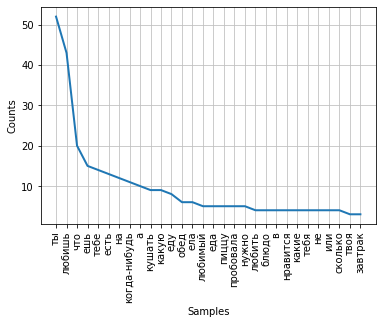

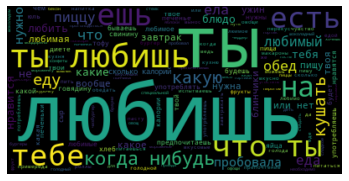

In [ ]:
freq_anal("Small_talk_food")

[('любишь', 43), ('ешь', 15), ('тебе', 14), ('когда-нибудь', 11), ('кушать', 9), ('какую', 9), ('еду', 8), ('обед', 6), ('ела', 6)]


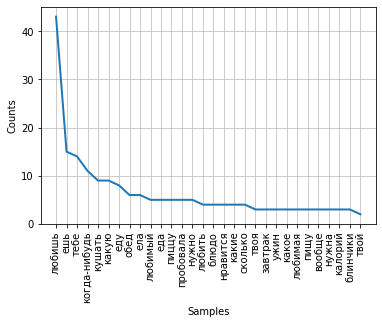

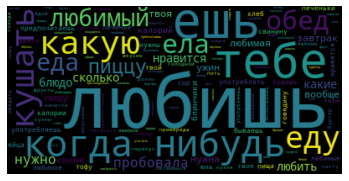

In [ ]:
freq_anal("Small_talk_food", 1)

### d.

In [ ]:
df_group = df.copy(deep=1)

In [ ]:
def join_intents_in_groups (p_genre, p_groups):
    """
    Функция для объединения нескольких классов в строчку с перечислением этих самых классов
    """
    res = 'other'
    for group in p_groups:
        if p_genre in group:
            res = ', '.join(group)
            break   
    return res 

In [ ]:
groups = [['Small_talk_food', 'Small_talk_hungry'],
          ['Another_joke', 'Small_talk_haha', 'Bad_joke', 'Tell_joke', 'Small_talk_joke'], 
          ['Whoops', 'Sorry'],
          ['Smalltalk_answer','Small_talk_what-what', 'I_can_help', 'Question'],
          ["Small_talk_boss", "Small_talk_fired", "Small_talk_work"], 
          ["Small_talk_you_are_right", "Compliment", "Small_talk_good_mood", "Positive-reaction", "Thank_you"], 
          ["Sick_of_listeting", "Small_talk_boring"], 
          ["Small_talk_creators", "Small_talk_technology", "Small_talk_hobby", "Small_talk_film", "Small_talk_music"],
          ["Messing_up", "Small_talk_danger"],
          ["Small_talk_relationships", "Small_talk_love", "Small_talk_age", "Small_talk_residence", "You_are", "Small_talk_life", "Tell_about_you"],
          ["Hello", "Small_talk_lets_talk", "Name", "smalltalk_greetings_nice_to_see_you"],
          ["Small_talk_ugly", "Small_talk_user_angry", "Negative_reaction", "Small_talk_user_sad", "Small_talk_bad_mood"],
          ["Finish", "Small_talkt_wait", "Small_talk_chatbot", "Small_talk_busy", "smalltalk_user_will_be_back", "AreYouHere"]]

df_group['intent'] = df_group['intent'].apply(lambda x: join_intents_in_groups(x, groups))

df_group

,intent,phrase
0,"Small_talk_you_are_right, Compliment, Small_ta...",- а то
1,"Small_talk_you_are_right, Compliment, Small_ta...",- а я о чем и говорю
2,"Small_talk_you_are_right, Compliment, Small_ta...",- бомба
3,"Small_talk_you_are_right, Compliment, Small_ta...",- вай-вай
4,"Small_talk_you_are_right, Compliment, Small_ta...",- вау
...,...,...
2085,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- чудесно увидеть тебя
2086,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- это чудо видеть тебя здесь снова
2087,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- хорошо что ты снова тут
2088,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- приятно видеть тебя


,intent,intent_cnt
0,"Another_joke, Small_talk_haha, Bad_joke, Tell_...",258
1,"Small_talk_you_are_right, Compliment, Small_ta...",205
2,"Small_talk_boss, Small_talk_fired, Small_talk_...",204
3,"Small_talk_relationships, Small_talk_love, Sma...",200
4,"Smalltalk_answer, Small_talk_what-what, I_can_...",174
5,"Whoops, Sorry",157
6,"Small_talk_ugly, Small_talk_user_angry, Negati...",149
7,"Small_talk_creators, Small_talk_technology, Sm...",143
8,"Small_talk_food, Small_talk_hungry",136
9,"Finish, Small_talkt_wait, Small_talk_chatbot, ...",115


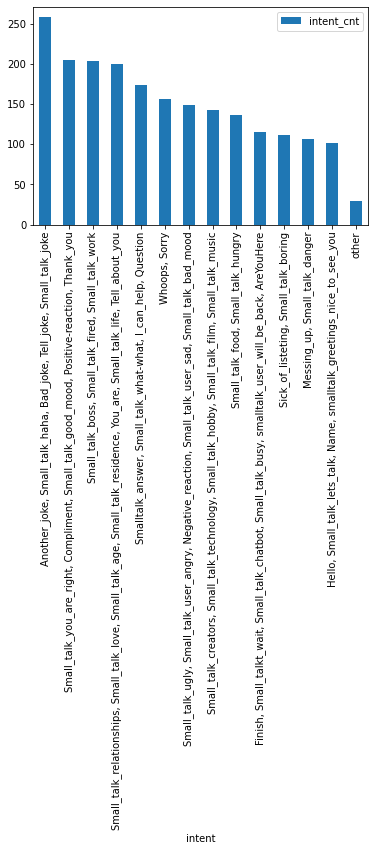

In [ ]:
intent_count_df = df_group[['phrase','intent']].groupby('intent').agg('count').sort_values('phrase', ascending = False)

intent_count_df.reset_index(inplace = True)
intent_count_df.rename(columns ={'phrase':'intent_cnt'}, inplace = True)

intent_count_df.plot.bar(y = 'intent_cnt', x = 'intent')

intent_count_df

### e.

По результатам выполнения 1-го задания можно сделать следующие выводы:
* Набор данных несбалансирован, кол-во экземпляров разных классов очень сильно рознится, поэтому для обучения моделей было решено группировать классы в группы по смыслу и тем самым +- сбалансировать датасет (из 54 классов было получено 14).

* В результате частотного анализа датасета выяснилось, что максимальная длина фразы - 13 слов; в среднем длина сообщения 3 слова. Так как имеется 54 класса, то вывод частотного анализа по каждому из них будет чрезмерно громоздким, поэтому была написана фукнция для произведения частотного анализа по фразам, принадлежащим __введённому__ классу.

* Обычно в процессе подготовки датасета для обучения NLP производится фильтрация стоп-слов. В коде присутствует функция, которая выполняет данное действие, но специфика датасета - светский разговор/болтовня/пустой разговор. Фразы подобного рода очень часто как раз и состоят из "стоп-слов", так что в случае их удаления короткие фразы полностью теряют смысл, так что может исчезнуть смысловая связь с классом. Поэтому я воспользуюсь Vision Driven подходом: дальнейшем обучении используется датасет БЕЗ удаления стоп-слов.

## 2

### a.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
df_group['tokenized_easy'] = df_group['tokenized_easy'].apply(lambda x: ['<START>'] + x)

In [ ]:
df_group

,intent,phrase,phrase_norm,tokenized,tokenized_easy,words_count
0,"Small_talk_you_are_right, Compliment, Small_ta...",- а то,- а тый,[тый],"[<START>, <START>, а, тый]",2
1,"Small_talk_you_are_right, Compliment, Small_ta...",- а я о чем и говорю,- а я о чем и говорить,[говорить],"[<START>, <START>, а, я, о, чем, и, говорить]",6
2,"Small_talk_you_are_right, Compliment, Small_ta...",- бомба,- бомба,[бомба],"[<START>, <START>, бомба]",1
3,"Small_talk_you_are_right, Compliment, Small_ta...",- вай-вай,- вай-вать,[вай-вать],"[<START>, <START>, вай-вать]",1
4,"Small_talk_you_are_right, Compliment, Small_ta...",- вау,- вау,[вау],"[<START>, <START>, вау]",1
...,...,...,...,...,...,...
2085,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- чудесно увидеть тебя,- чудесно увидеть тести,"[чудесно, увидеть, тести]","[<START>, <START>, чудесно, увидеть, тести]",3
2086,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- это чудо видеть тебя здесь снова,- это чудо видеть тебя здесь снова,"[это, чудо, видеть, снова]","[<START>, <START>, это, чудо, видеть, тебя, зд...",6
2087,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- хорошо что ты снова тут,- хорошо что ты снова тут,[снова],"[<START>, <START>, хорошо, что, ты, снова, тут]",5
2088,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- приятно видеть тебя,- приятно видеть тести,"[приятно, видеть, тести]","[<START>, <START>, приятно, видеть, тести]",3


In [ ]:
df_group.to_csv("/content/drive/MyDrive/data/elma/df_group.csv")

In [ ]:
tokenizer = Tokenizer(num_words=2000, lower=1, oov_token="<UNKNOWN>")
tokenizer.fit_on_texts(df_group['tokenized_easy'])
word_index_ = tokenizer.word_index

In [ ]:
word_index_

{'<UNKNOWN>': 1,
 '<start>': 2,
 'ты': 3,
 'не': 4,
 'тебя': 5,
 'я': 6,
 'что': 7,
 'мне': 8,
 'кто': 9,
 'это': 10,
 'шутка': 11,
 'тебе': 12,
 'у': 13,
 'есть': 14,
 'любишь': 15,
 'как': 16,
 'в': 17,
 'можешь': 18,
 'на': 19,
 'с': 20,
 'меня': 21,
 'а': 22,
 'так': 23,
 'шутки': 24,
 'о': 25,
 'твой': 26,
 'тести': 27,
 'бот': 28,
 'очень': 29,
 'работа': 30,
 'еще': 31,
 'от': 32,
 'больше': 33,
 'да': 34,
 'уволить': 35,
 'имя': 36,
 'знаешь': 37,
 'менить': 38,
 'шутку': 39,
 'быть': 40,
 'твоя': 41,
 'какая': 42,
 'ли': 43,
 'другую': 44,
 'любовь': 45,
 'за': 46,
 'хочу': 47,
 'же': 48,
 'бы': 49,
 'тобой': 50,
 'ну': 51,
 'правда': 52,
 'вы': 53,
 'пожалуйста': 54,
 'и': 55,
 'уже': 56,
 'надо': 57,
 'ничего': 58,
 'нравится': 59,
 'для': 60,
 'жалить': 61,
 'нет': 62,
 'к': 63,
 'какую': 64,
 'ешь': 65,
 'какие': 66,
 'все': 67,
 'расскажи': 68,
 'твои': 69,
 'было': 70,
 'твое': 71,
 'настроение': 72,
 'хотел': 73,
 'когда-нибудь': 74,
 'хватит': 75,
 'давай': 76,
 'сегод

In [ ]:
import pickle

with open('/content/drive/MyDrive/data/elma/word_index_.json', 'wb') as fp:
    pickle.dump(word_index_, fp)

In [ ]:
data = tokenizer.texts_to_sequences(df_group['tokenized_easy'])

In [ ]:
data

[[2, 22, 347],
 [2, 22, 6, 25, 82, 55, 224],
 [2, 477],
 [2, 764],
 [2, 478],
 [2, 479, 765],
 [2, 265],
 [2, 160, 766],
 [2, 105, 10, 6, 266, 480],
 [2, 481, 481],
 [2, 767],
 [2, 768],
 [2, 769],
 [2, 8, 225],
 [2, 770],
 [2, 348],
 [2, 771],
 [2, 482],
 [2, 483],
 [2, 484],
 [2, 772],
 [2, 773],
 [2, 774, 477],
 [2, 775],
 [2, 186],
 [2, 226],
 [2, 776],
 [2, 349],
 [2, 4, 186],
 [2, 4, 186],
 [2, 777],
 [2, 778, 267],
 [2, 779, 267],
 [2, 33, 4, 780],
 [2, 781, 56],
 [2, 134],
 [2, 485, 782],
 [2, 783, 784],
 [2, 785],
 [2, 8, 4, 225],
 [2, 786, 267],
 [2, 4, 57, 8, 58, 32, 27],
 [2, 4, 59, 787],
 [2, 4, 161, 8, 41, 486],
 [2, 4, 788, 38],
 [2, 4, 789],
 [2, 4, 268, 269],
 [2, 270, 790, 92, 269],
 [2, 227, 46, 791],
 [2, 58, 4, 57],
 [2, 792],
 [2, 4, 268, 793],
 [2, 58, 4, 487],
 [2, 162, 4, 106, 20, 50],
 [2, 794],
 [2, 795, 267],
 [2, 796, 797],
 [2, 798],
 [2, 799, 800],
 [2, 488],
 [2, 801, 187, 60, 27],
 [2, 28, 488],
 [2, 28, 802, 350],
 [2, 803, 804],
 [2, 350],
 [2, 105, 2

In [ ]:
MAX_SEQ_LEN = df_group['tokenized_easy'].apply(len).max() + 1

features = tf.keras.preprocessing.sequence.pad_sequences(data,
                                                         value =0,
                                                         padding = 'post',
                                                         maxlen = MAX_SEQ_LEN)


targets = pd.get_dummies(df_group['intent']).values

In [ ]:
df_group

,intent,phrase,phrase_norm,tokenized,tokenized_easy,words_count
0,"Small_talk_you_are_right, Compliment, Small_ta...",- а то,- а тый,[тый],"[<START>, <START>, а, тый]",2
1,"Small_talk_you_are_right, Compliment, Small_ta...",- а я о чем и говорю,- а я о чем и говорить,[говорить],"[<START>, <START>, а, я, о, чем, и, говорить]",6
2,"Small_talk_you_are_right, Compliment, Small_ta...",- бомба,- бомба,[бомба],"[<START>, <START>, бомба]",1
3,"Small_talk_you_are_right, Compliment, Small_ta...",- вай-вай,- вай-вать,[вай-вать],"[<START>, <START>, вай-вать]",1
4,"Small_talk_you_are_right, Compliment, Small_ta...",- вау,- вау,[вау],"[<START>, <START>, вау]",1
...,...,...,...,...,...,...
2085,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- чудесно увидеть тебя,- чудесно увидеть тести,"[чудесно, увидеть, тести]","[<START>, <START>, чудесно, увидеть, тести]",3
2086,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- это чудо видеть тебя здесь снова,- это чудо видеть тебя здесь снова,"[это, чудо, видеть, снова]","[<START>, <START>, это, чудо, видеть, тебя, зд...",6
2087,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- хорошо что ты снова тут,- хорошо что ты снова тут,[снова],"[<START>, <START>, хорошо, что, ты, снова, тут]",5
2088,"Hello, Small_talk_lets_talk, Name, smalltalk_g...",- приятно видеть тебя,- приятно видеть тести,"[приятно, видеть, тести]","[<START>, <START>, приятно, видеть, тести]",3


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=42)

In [ ]:
print(f"train: X {X_train.shape}, y {y_train.shape}")
print(f"test: X {X_test.shape}, y {y_test.shape}")

train: X (1567, 16), y (1567, 14)
test: X (523, 16), y (523, 14)


In [ ]:
X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
VOCAB_SIZE = len(word_index_) + 1
EMB_SIZE = 64
CLASSES_COUNT = y_test_part.shape[1]

model_120 = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, EMB_SIZE),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(EMB_SIZE, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(EMB_SIZE, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(CLASSES_COUNT, activation=tf.nn.softmax),
])


BATCH_SIZE = 64
NUM_EPOCHS = 120

cpt_path = '/content/drive/MyDrive/models/elma/intent_detector_2drop02_01.hdf5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, 
                                                monitor='val_acc', 
                                                verbose=1, 
                                                save_best_only= True, 
                                                mode='max')

model_120.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc'])


history = model_120.fit(X_train_part, y_train_part, 
                    validation_data=(X_test_part, y_test_part), 
                    epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    verbose=1,
                    callbacks=[checkpoint])

Epoch 1/120
19/19 [==============================] - 16s 212ms/step - loss: 2.5216 - acc: 0.1277 - val_loss: 2.3037 - val_acc: 0.2066

Epoch 00001: val_acc improved from -inf to 0.20663, saving model to /content/drive/MyDrive/models/elma/intent_detector_2drop02_01.hdf5
Epoch 2/120
19/19 [==============================] - 3s 155ms/step - loss: 1.9096 - acc: 0.3455 - val_loss: 1.9425 - val_acc: 0.3469

Epoch 00002: val_acc improved from 0.20663 to 0.34694, saving model to /content/drive/MyDrive/models/elma/intent_detector_2drop02_01.hdf5
Epoch 3/120
19/19 [==============================] - 3s 154ms/step - loss: 1.2220 - acc: 0.5753 - val_loss: 1.7736 - val_acc: 0.4337

Epoch 00003: val_acc improved from 0.34694 to 0.43367, saving model to /content/drive/MyDrive/models/elma/intent_detector_2drop02_01.hdf5
Epoch 4/120
19/19 [==============================] - 3s 158ms/step - loss: 0.6709 - acc: 0.7634 - val_loss: 1.8970 - val_acc: 0.5255

Epoch 00004: val_acc improved from 0.43367 to 0.5255

In [ ]:
tf.saved_model.save(model, "/content/drive/MyDrive/models/elma/Bidirectional_LSTM/saved_model_2drop02_lr01")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/models/elma/Bidirectional_LSTM/2drop02_lr01/assets


In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/models/elma/Bidirectional_LSTM/2drop02_lr01")
results = model.evaluate(X_test, y_test)


print('Test loss: {:.4f}'.format(results[0]))
print('Test accuracy: {:.2f} %'.format(results[1]*100))

17/17 [==============================] - 1s 13ms/step - loss: 3.0079 - acc: 0.6348
Test loss: 3.0079
Test accuracy: 63.48 %


In [ ]:
import numpy as np


def encode(phrase):
  string = norm_converter(phrase)
  words = string.split(" ")
  encoded_phrase = [word_index_["<start>"]]
  for token in words:
    index = word_index_.get(token, word_index_["<UNKNOWN>"])
    encoded_phrase.append(index)
  return encoded_phrase

def expand(x, filler, gl=15):
    n = gl - len(x)
    if n > 0:
        x.extend([filler]*n)
    return np.asarray(x, dtype="int32")

In [ ]:
import tensorflow as tf

phrase = "кушать"
encoded_phrase = expand(encode(phrase), 0)
print(dict_labels[np.argmax(model.predict(np.array(encoded_phrase)[None, :]).ravel())])

['Small_talk_food', 'Small_talk_hungry']


In [ ]:
groups = [['Small_talk_food', 'Small_talk_hungry'],
          ['Another_joke', 'Small_talk_haha', 'Bad_joke', 'Tell_joke', 'Small_talk_joke'], 
          ['Whoops', 'Sorry'],
          ['Smalltalk_answer','Small_talk_what-what', 'I_can_help', 'Question'],
          ["Small_talk_boss", "Small_talk_fired", "Small_talk_work"], 
          ["Small_talk_you_are_right", "Compliment", "Small_talk_good_mood", "Positive-reaction", "Thank_you"], 
          ["Sick_of_listeting", "Small_talk_boring"], 
          ["Small_talk_creators", "Small_talk_technology", "Small_talk_hobby", "Small_talk_film", "Small_talk_music"],
          ["Messing_up", "Small_talk_danger"],
          ["Small_talk_relationships", "Small_talk_love", "Small_talk_age", "Small_talk_residence", "You_are", "Small_talk_life", "Tell_about_you"],
          ["Hello", "Small_talk_lets_talk", "Name", "smalltalk_greetings_nice_to_see_you"],
          ["Small_talk_ugly", "Small_talk_user_angry", "Negative_reaction", "Small_talk_user_sad", "Small_talk_bad_mood"],
          ["Finish", "Small_talkt_wait", "Small_talk_chatbot", "Small_talk_busy", "smalltalk_user_will_be_back", "AreYouHere"]]

label_order = sorted(groups, key=lambda x: x[0])
dict_labels = {13: 'other'}
i = 0
for labels in label_order:
  dict_labels[i] = labels
  i += 1

### b.

Была разработана двунаправленная рекуррентная сеть, которой удалось достигнуть максимального качества метрики __accuracy__ на валидации в 63%. Также были эксперименты по имплементации готовых моделей tensorflow, например, Bert, но достигнуть приличного качества не удалось. Посмотреть код можно [здесь](https://colab.research.google.com/drive/1e9WmcnQwJi0RdmqWFuV90aX7sGCGl5_Q?usp=sharing).

* Итоговая модель обучена на 60 эпохах. 
* Время инференса модели - от 2.2 до 2.6 секунд на 1 фразу.
* Вес модели - 7.55Мб.
* Для дальнейшего использования в веб-приложении сделаны файлы .JSON со словарём индексов и с именованными индексами классов.
* Также приготовлены функции перевода введённой фразы в индексы слов словаря и паддинг до нужного размера для применения в веб-приложении.